In [222]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Deep Neural Networks 

## Moons and Decision boundary

## Import Statements

In [117]:
###-----------------
### Import libraries
###-----------------
from pathlib import Path  # Import Path for file system path operations and management
import numpy as np  # Import NumPy for numerical computations and array operations
import pandas as pd  # Import Pandas for data manipulation and analysis with DataFrames
import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive visualizations
import seaborn as sns  # Import Seaborn for statistical data visualization built on Matplotlib
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split  # Import function to split dataset into training and testing subsets
from sklearn.metrics import (accuracy_score, 
                             classification_report, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay, 
                             f1_score)  # Import function to calculate various metric
from sklearn.preprocessing import StandardScaler,LabelEncoder
import tensorflow as tf
import sys
# import helper as hp

ModuleNotFoundError: No module named 'utils.log_event'

In [118]:
def fn_plot_confusion_matrix(y_true, y_pred, labels):
    '''
    Args:
        y_true: Ground Truth
        y_pred : Predictions
        labels : labels in a dictonary
                  {0: 'Goal Keeper',
                  1: 'Defender',
                  2: 'Mid-Fielder',
                  3: 'Forward'}

    '''

    cm  = confusion_matrix(y_true, y_pred)

    if isinstance(labels, dict):
        display_labels = labels.values()
    else:
        display_labels = labels

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=display_labels)

    fig, ax = plt.subplots(figsize = (4,4))

    disp.plot(ax = ax, cmap = 'Blues', xticks_rotation = 'vertical', colorbar=False)

    # Disable the grid
    ax.grid(False)

    plt.show()


In [119]:
###------------------
### Global Parameters
###------------------

# # Directories
# #inpDir = '../../input'
# inpDir = Path('..') / '..' / 'input'
# # outDir = '../output'
# outDir = Path('..') / 'output'


RANDOM_STATE = 42
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results
tf.random.set_seed(RANDOM_STATE)
# rng=np.random.default_rng(seed=RANDOM_STATE)
TEST_SIZE  = 0.2 # Size of test data

# Parameters for plotting
NOISE=0.2
EPOCHS=100
ALPHA=0.001
N_SAMPLE=1000

params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'medium',
          'ytick.labelsize':'medium'
         }

CMAP = plt.cm.coolwarm

plt.rcParams.update(params)

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [112]:
# physical_devices=tf.config.list_physical_devices('GPU')
# print(physical_devices)
# if len(physical_devices) > 0:
    # tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [113]:
data_df=pd.read_csv("Wine.csv")
data_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [114]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

In [115]:
data_df.describe().T


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [76]:
for col in data_df.columns:
    print(f"Column: {col}-{data_df[col].unique()}")

Column: alcohol-[14.23 13.2  13.16 14.37 13.24 14.2  14.39 14.06 14.83 13.86 14.1  14.12
 13.75 14.75 14.38 13.63 14.3  13.83 14.19 13.64 12.93 13.71 12.85 13.5
 13.05 13.39 13.3  13.87 14.02 13.73 13.58 13.68 13.76 13.51 13.48 13.28
 13.07 14.22 13.56 13.41 13.88 14.21 13.9  13.94 13.82 13.77 13.74 13.29
 13.72 12.37 12.33 12.64 13.67 12.17 13.11 13.34 12.21 12.29 13.49 12.99
 11.96 11.66 13.03 11.84 12.7  12.   12.72 12.08 12.67 12.16 11.65 11.64
 12.69 11.62 12.47 11.81 12.6  12.34 11.82 12.51 12.42 12.25 12.22 11.61
 11.46 12.52 11.76 11.41 11.03 12.77 11.45 11.56 11.87 12.07 12.43 11.79
 12.04 12.86 12.88 12.81 12.53 12.84 13.36 13.52 13.62 12.87 13.32 13.08
 12.79 13.23 12.58 13.17 13.84 12.45 14.34 12.36 13.69 12.96 13.78 13.45
 12.82 13.4  12.2  14.16 13.27 14.13]
Column: malic_acid-[1.71 1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 1.48 1.73 1.81
 1.92 1.57 1.59 3.1  1.63 3.8  1.86 1.6  2.05 1.77 1.72 1.9  1.68 1.5
 1.66 1.83 1.53 1.8  1.65 3.99 3.84 1.89 3.98 4.04 3.59 2

In [77]:
data_df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

<Axes: >

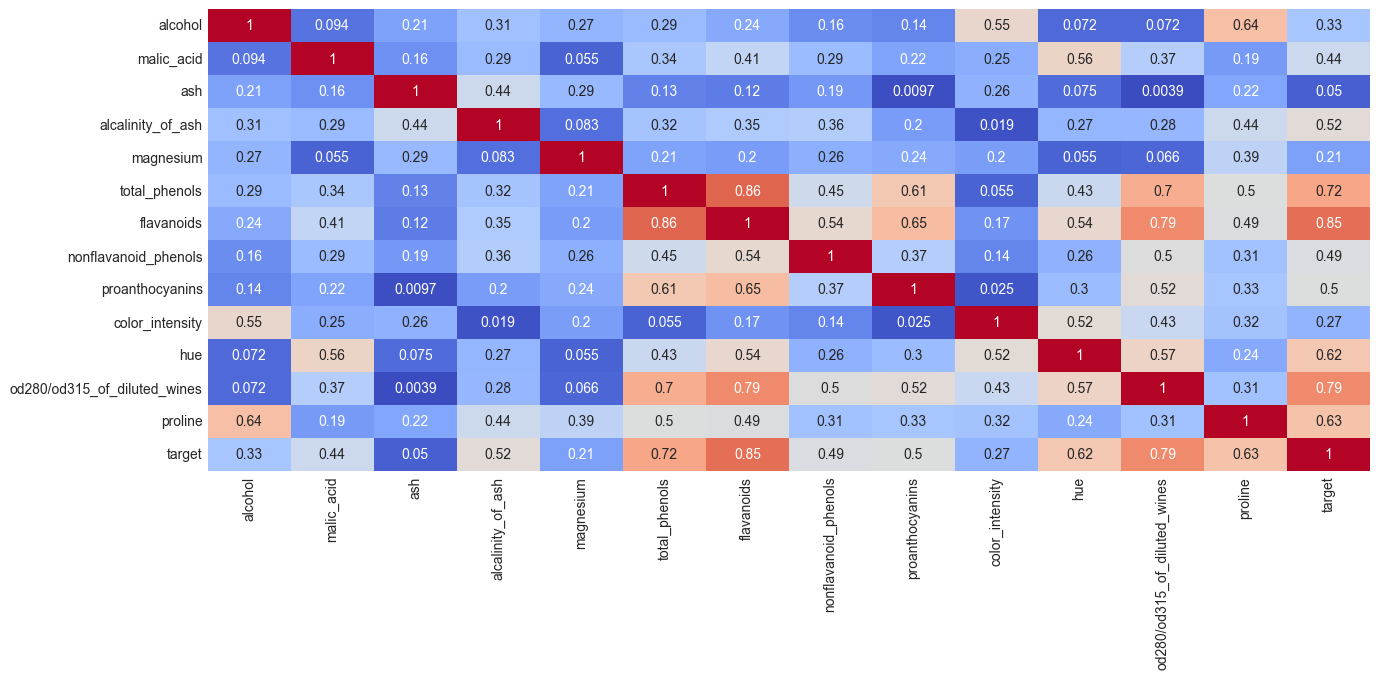

In [78]:
fig,ax=plt.subplots()
sns.heatmap(data_df.corr().abs(),ax=ax,fmt=".2g", annot=True, cmap=CMAP,cbar=False)

In [79]:
labels=data_df[data_df.columns[-1]]
features_df=data_df.drop(data_df.columns[-1],axis=1)
features_df.shape,labels.shape

((178, 13), (178,))

In [80]:
X_train, X_test, y_train, y_test = train_test_split(features_df,labels, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=labels)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [81]:


ss=StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [82]:
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

DEFINE MODELS

In [83]:
model=tf.keras.Sequential([
    tf.keras.Input(shape=(X_train.shape[1],)),      #Every line is a layer
    tf.keras.layers.Dense(8, activation='relu'),    #It receives something from the top and sends something to the bottom
    tf.keras.layers.Dense(3) #Output here will be a logit                       #They have their own forward and backward propagation

])

In [84]:
print(model)

<Sequential name=sequential_3, built=True>


In [26]:
# functional API

# inputs=tf.keras.Input(shape=(X_train.shape[1],))
# x=tf.keras.layers.Dense(8,activation='relu')(inputs)
# outputs=tf.keras.layers.Dense(3)(x)
# model1=tf.keras.Model(inputs=inputs,outputs=outputs)

In [27]:
# print(model1)

<Functional name=functional, built=True>


In [85]:
X_train[:1].shape

(1, 13)

In [86]:

predictions=model(X_train[:1]).numpy()
predictions

array([[-0.07710539,  0.06619715,  0.28679803]], dtype=float32)

In [87]:
predictions.sum() #Logits

np.float32(0.27588978)

In [88]:
tf.nn.softmax(predictions).numpy().sum()    #Convert to probabilities

np.float32(1.0)

In [89]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 8)              │           112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 139 (556.00 B)

 Trainable params: 139 (556.00 B)

 Non-trainable params: 0 (0.00 B)

In [90]:
np.log(sys.float_info.max)

np.float64(709.782712893384)

In [91]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [92]:
y_train[:1].shape,predictions.shape

((1,), (1, 3))

In [93]:
loss_fn(y_train[:1],predictions)

<tf.Tensor: shape=(), dtype=float32, numpy=1.278991460800171>

In [94]:
optimizer=tf.keras.optimizers.Adam(learning_rate=ALPHA)

In [95]:
model.compile(optimizer=optimizer,loss=loss_fn,metrics=['accuracy'])

In [96]:
history=model.fit(X_train,y_train,epochs=EPOCHS,validation_data=(X_test,y_test))
#Validation data- whatever training is done, monitor the performance on the give dataset in ()


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.3451 - loss: 1.3304 - val_accuracy: 0.3611 - val_loss: 1.3063
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.3803 - loss: 1.2748 - val_accuracy: 0.3611 - val_loss: 1.2565
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.3944 - loss: 1.2222 - val_accuracy: 0.3611 - val_loss: 1.2085
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4225 - loss: 1.1722 - val_accuracy: 0.3611 - val_loss: 1.1632
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4296 - loss: 1.1248 - val_accuracy: 0.3889 - val_loss: 1.1200
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.4648 - loss: 1.0799 - val_accuracy: 0.4167 - val_loss: 1.0787
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4718 - loss: 1.0376 - val_accuracy: 0.4444 - val_loss: 1.0394
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.4859 - loss: 0.9974 - val_accuracy: 0.5000 - val_loss:

In [97]:
model.evaluate(X_test,y_test)   #Loss on test, Accuracy

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.9444 - loss: 0.1161


[0.11610518395900726, 0.9444444179534912]

<Axes: >

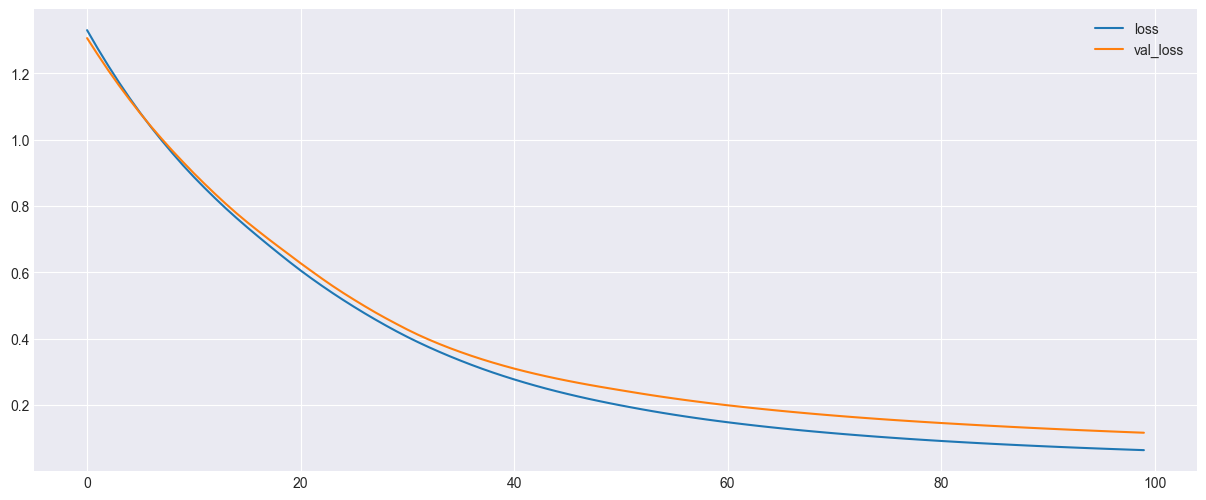

In [98]:
loss_df=pd.DataFrame(history.history)
loss_df.plot(y=['loss','val_loss'])

In [99]:
loss_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.345070,1.330359,0.361111,1.306322
1,0.380282,1.274761,0.361111,1.256517
2,0.394366,1.222249,0.361111,1.208528
3,0.422535,1.172231,0.361111,1.163220
4,0.429577,1.124802,0.388889,1.120007


<Axes: >

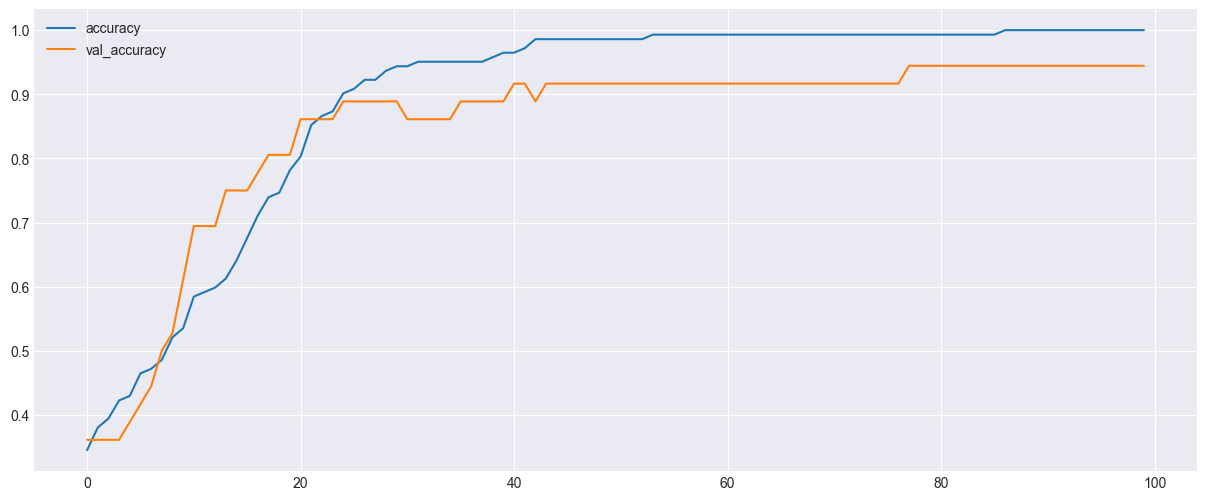

In [100]:
loss_df.plot(y=['accuracy','val_accuracy'])

In [102]:
class_names={}
for i,cl in enumerate(le.classes_):
    class_names[i]=cl
class_names

{0: np.int64(0), 1: np.int64(1), 2: np.int64(2)}

PREDICTIONS

PERFORMING ON TRAINING DATA

In [103]:
prob_model=tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [104]:
y_pred=prob_model(X_train).numpy()
print(f"Accuracy: {accuracy_score(y_train,y_pred.argmax(axis=1)):.4f}%")
print(classification_report(y_train,y_pred.argmax(axis=1)))

Accuracy: 1.0000%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        38

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [120]:
print(confusion_matrix(y_train,y_pred.argmax(axis=1)))

[[47  0  0]
 [ 0 57  0]
 [ 0  0 38]]


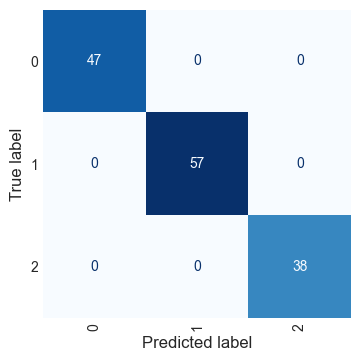

In [126]:

fn_plot_confusion_matrix(y_train,y_pred.argmax(axis=1),labels=class_names)

testing data

In [127]:
y_pred=prob_model(X_test).numpy()
print(f"Accuracy: {accuracy_score(y_test,y_pred.argmax(axis=1)):.4f}%")
print(classification_report(y_test,y_pred.argmax(axis=1)))

Accuracy: 0.9444%
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       1.00      0.86      0.92        14
           2       0.91      1.00      0.95        10

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36



In [131]:
print(confusion_matrix(y_test,y_pred.argmax(axis=1)))

[[12  0  0]
 [ 1 12  1]
 [ 0  0 10]]


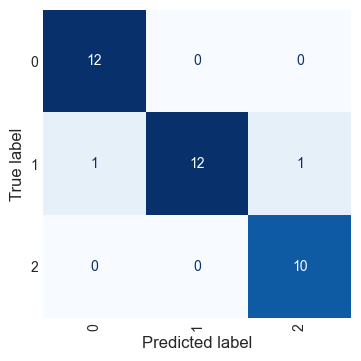

In [133]:
fn_plot_confusion_matrix(y_test,y_pred.argmax(axis=1),labels=class_names)

In [256]:
print(f'Accuracy Score: {accuracy_score(y_test.argmax(axis=1),y_pred)}')

Accuracy Score: 0.985


In [257]:
print(classification_report(y_test.argmax(axis=1),y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       100
           1       0.99      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.99      0.98      0.98       200
weighted avg       0.99      0.98      0.98       200



In [257]:
cm=confusion_matrix(y_test.argmax(axis=1),y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['A','B'])
fig,ax=plt.subplots(figsize=(8,8))
disp.plot(ax=ax,cmap='Blues',colorbar=False)
ax.grid(False)
ax.set_title(f'F1 Score: {f1_score(y_test.argmax(axis=1),y_pred,average='weighted')}')